In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
#Will Work only on Train data set
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
df.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
15111,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
666,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39698,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32367,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7554,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Shape of Dataset
df.shape

(42000, 785)

In [5]:
#Dataset information
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [7]:
#checking image files show correct So importing Graph libaray
import matplotlib.pyplot as plt

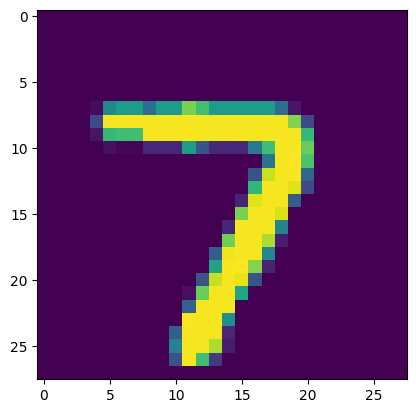

In [8]:
#checking image example
plt.imshow(df.iloc[7306,1:].values.reshape(28,28))

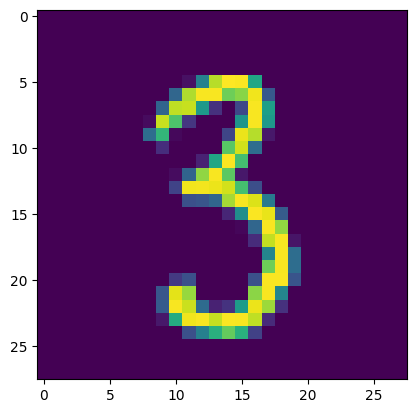

In [9]:
#checking image example
plt.imshow(df.iloc[40164,1:].values.reshape(28,28))

In [10]:
#Extract Value in X and Y(Column Selection)
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [11]:
X.shape

(42000, 784)

In [12]:
y.shape

(42000,)

In [13]:
#Model Selection
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [15]:
X_train.shape

(31500, 784)

In [16]:
y_train.shape

(31500,)

In [17]:
#Data centering
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# making object
knn = KNeighborsClassifier()

In [19]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [20]:
y_pred = knn.predict(X_test)

In [21]:
#checking Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9666666666666667

In [22]:
#Using Preprocessing mean center
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [24]:
#Using PCA reduce the Data columns and find the best number columns with high accuracy
from sklearn.decomposition import PCA

In [25]:
#Selecting All columns first time
pca = PCA(n_components=None)

In [26]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [27]:
X_train.shape

(31500, 784)

In [28]:
#Selecting 200 columns first time
pca = PCA(n_components=200)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [29]:
X_train_trf.shape

(31500, 200)

In [30]:
knn = KNeighborsClassifier()

In [31]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [32]:
y_pred = knn.predict(X_test_trf)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test,y_pred)

0.6479047619047619

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
#Create a loop to check at what Column count model give best accuracy to check beeter Outcome
#Accouracy stop chose = 95% becoz if not then it goes till all colmn till highest accuracy %

for i in range(1, 785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    knn.fit(X_train_trf, y_train)
    y_pred = knn.predict(X_test_trf)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy, "n_components:", i)
    
    if accuracy > 0.95:
        print("Accuracy above 95% achieved. Breaking the loop.")
        break
        #break on 95% if not then it will run till 784 times till this will end

Accuracy: 0.25266666666666665 n_components: 1
Accuracy: 0.32866666666666666 n_components: 2
Accuracy: 0.5122857142857142 n_components: 3
Accuracy: 0.6658095238095239 n_components: 4
Accuracy: 0.7363809523809524 n_components: 5
Accuracy: 0.8247619047619048 n_components: 6
Accuracy: 0.8419047619047619 n_components: 7
Accuracy: 0.8712380952380953 n_components: 8
Accuracy: 0.8841904761904762 n_components: 9
Accuracy: 0.9043809523809524 n_components: 10
Accuracy: 0.9120952380952381 n_components: 11
Accuracy: 0.918952380952381 n_components: 12
Accuracy: 0.9283809523809524 n_components: 13
Accuracy: 0.9332380952380952 n_components: 14
Accuracy: 0.9361904761904762 n_components: 15
Accuracy: 0.9376190476190476 n_components: 16
Accuracy: 0.940952380952381 n_components: 17
Accuracy: 0.9419047619047619 n_components: 18
Accuracy: 0.9434285714285714 n_components: 19
Accuracy: 0.942952380952381 n_components: 20
Accuracy: 0.9439047619047619 n_components: 21
Accuracy: 0.9457142857142857 n_components: 2

Digit Recognizer with PCA